In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [3]:
ds = tfds.load('fashion_mnist' , split = 'train')

In [4]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [5]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [6]:
import numpy as np
import pandas as pd

In [7]:
dataiterator = ds.as_numpy_iterator()

In [8]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

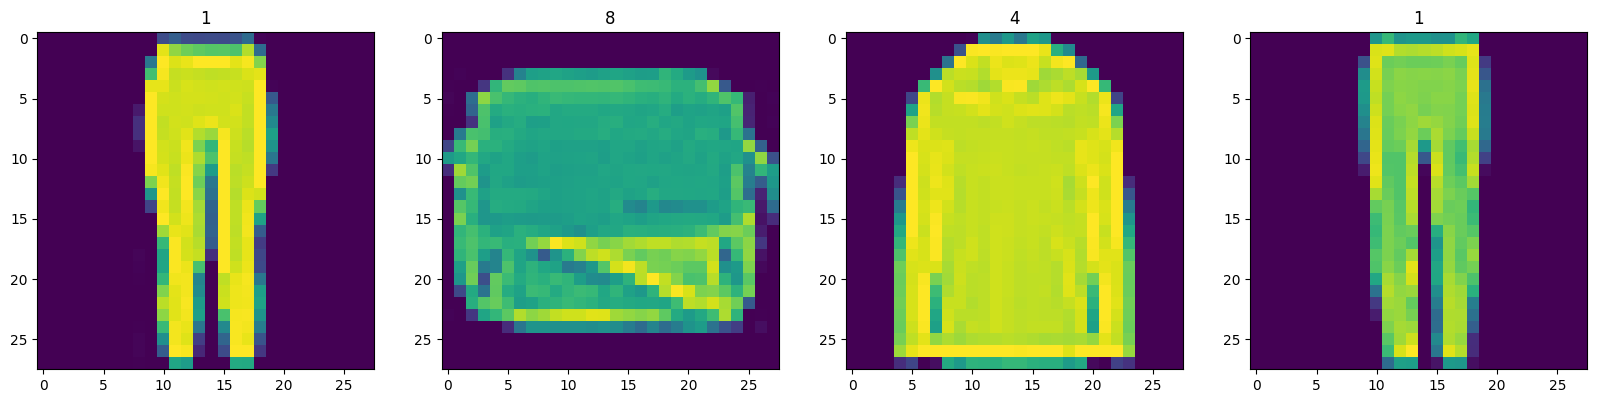

In [9]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))
for idx in range(4):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [10]:
def scale_images(data):
    image = data['image']
    return image/255

In [11]:
#For building a data pipeline
ds = tfds.load('fashion_mnist',split='train')
ds = ds.map(scale_images) # Running the dataset through the scale_images
ds = ds.cache()   # Cache the dataset for that batch
ds = ds.shuffle(60000) # Shuffling the dataset
ds = ds.batch(128)  # Batch into 128 images per sample
ds = ds.prefetch(64) # Reduces the likelihood of bottlenecking

In [12]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense ,Flatten , Reshape , LeakyReLU ,Dropout , UpSampling2D


In [30]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128 , input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,5,padding = 'same' , activation = 'sigmoid'))
    model.add(LeakyReLU(0.2))
    
    return model

In [31]:
generator = build_generator()

In [32]:
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 1)           │           3,201 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,156,289 (8.23 MB)

 Trainable params: 2,156,289 (8.23 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
img = generator.predict(np.random.randn(4,128,1))
len(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


4

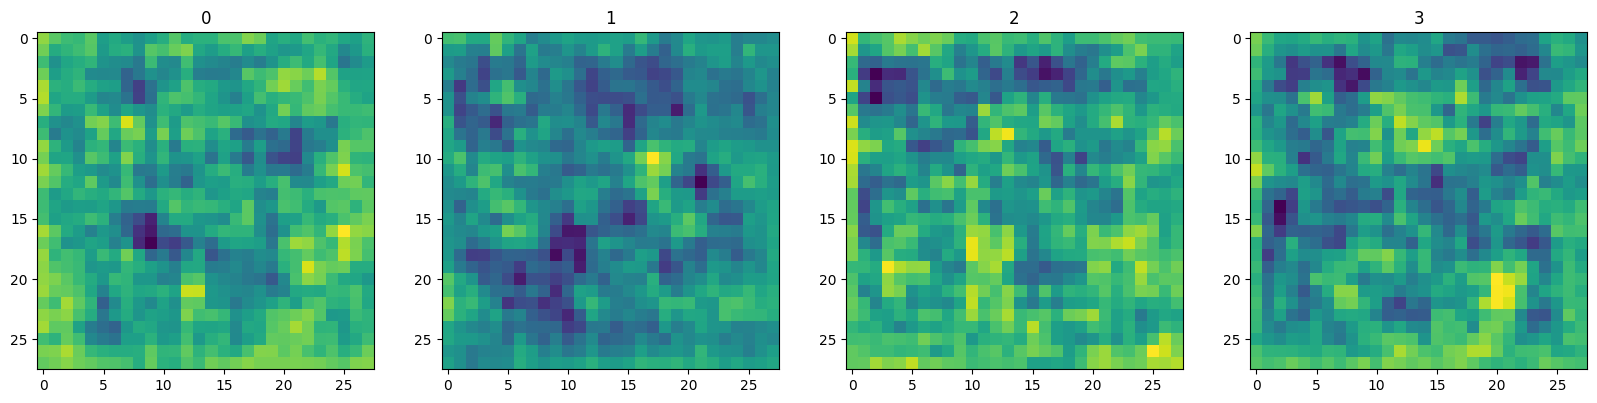

In [34]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))
for idx , im in enumerate(img):
    ax[idx].imshow(im)
    ax[idx].title.set_text(idx)

In [35]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(32 , 5 , input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64 , 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128 , 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256 , 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(1,activation = 'sigmoid'))
    
    return model

In [36]:
discriminator = build_discriminator()

In [37]:
discriminator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


array([[0.50040245],
       [0.50050175],
       [0.50041807],
       [0.50033975]], dtype=float32)

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [40]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [41]:
from tensorflow.keras.models import Model

In [48]:
class FashionGAN(Model):
    def __init__(self,generator,discriminator , *args , **kwargs):
        super().__init__(*args , **kwargs)

        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self , g_opt , d_opt , g_loss, d_loss , *args , **kwargs):
        super().compile(*args , **kwargs)

        self.g_opt = g_opt
        self.d_opt = d_opt 
        self.g_loss = g_loss
        self.d_loss = d_loss
        
    def train_step(self , batch ):

        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)) , training = False)

        #Training the discriminator
        with tf.GradientTape() as d_tape:
            #Pass the real and fake images to the discriminator model
            y_real = self.discriminator(real_images , training = True)
            y_fake = self.discriminator(fake_images , training = True)
            y_realfake = tf.concat([y_real,y_fake] ,axis = 0)
            #Create lables and add some noise to the outputs
            y_realFake = tf.concat([tf.zeros_like(y_real) , tf.ones_like(y_fake)],axis =0)

            noise_real = 0.15*tf.random.uniform(tf.shape(y_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(y_fake))
            y_realFake += tf.concat([noise_real , noise_fake],axis =0)
            #Calculate loss

            total_d_loss = self.d_loss(y_realFake , y_realfake)
                        
        #Apply BackPropogation
        dgrad = d_tape.gradient(total_d_loss , self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad , self.discriminator.trainable_variables))
        #Training the generator
        with tf.GradientTape() as g_tape:
            #Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)) , training = True)

            #Create predictive layers
            predicted_labels = self.discriminator(gen_images , training =False)

            #Calculate loss

            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
        #Apply backpropogation
        ggrad = g_tape.gradient(total_g_loss , self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad , self.generator.trainable_variables))

        return {"d_loss" : total_d_loss , "g_loss" : total_g_loss}
        

In [49]:
fashgan = FashionGAN(generator,discriminator)

In [50]:
fashgan.compile(g_opt , d_opt , g_loss, d_loss)

In [51]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [52]:
class ModelMonitor(Callback):
    def __init__(self,num_img = 3 , latent_dim = 128):
        self.num_img = num_img
        self.latent_dim = latent_dim
    def on_epock_end(self,epoch , logs = None):
        random_latent_vector = tf.random.uniform((self.num_img , self.latent_dim , 1))
        generated_images = self.model.generator(random_latent_vector)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))


In [ ]:
hist = fashgan.fit(ds , epochs = 20 , callbacks = [ModelMonitor()])

In [55]:
imgs = generator.predict(tf.random.normal((16,128,1)))
imgs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


array([[[[0.5573709 ],
         [0.57579845],
         [0.58405316],
         ...,
         [0.57077926],
         [0.545432  ],
         [0.51904577]],

        [[0.5760835 ],
         [0.60456145],
         [0.62873614],
         ...,
         [0.6136693 ],
         [0.57633007],
         [0.5443515 ]],

        [[0.5872196 ],
         [0.61869293],
         [0.64997476],
         ...,
         [0.65249944],
         [0.60783637],
         [0.5675356 ]],

        ...,

        [[0.53492445],
         [0.5493318 ],
         [0.5737597 ],
         ...,
         [0.5802725 ],
         [0.56323105],
         [0.5393132 ]],

        [[0.5320021 ],
         [0.5455675 ],
         [0.5589623 ],
         ...,
         [0.55673397],
         [0.5459812 ],
         [0.529091  ]],

        [[0.5192294 ],
         [0.52960867],
         [0.5467864 ],
         ...,
         [0.53630286],
         [0.5319405 ],
         [0.52355045]]],


       [[[0.5544529 ],
         [0.5748724 ],
         [0.59

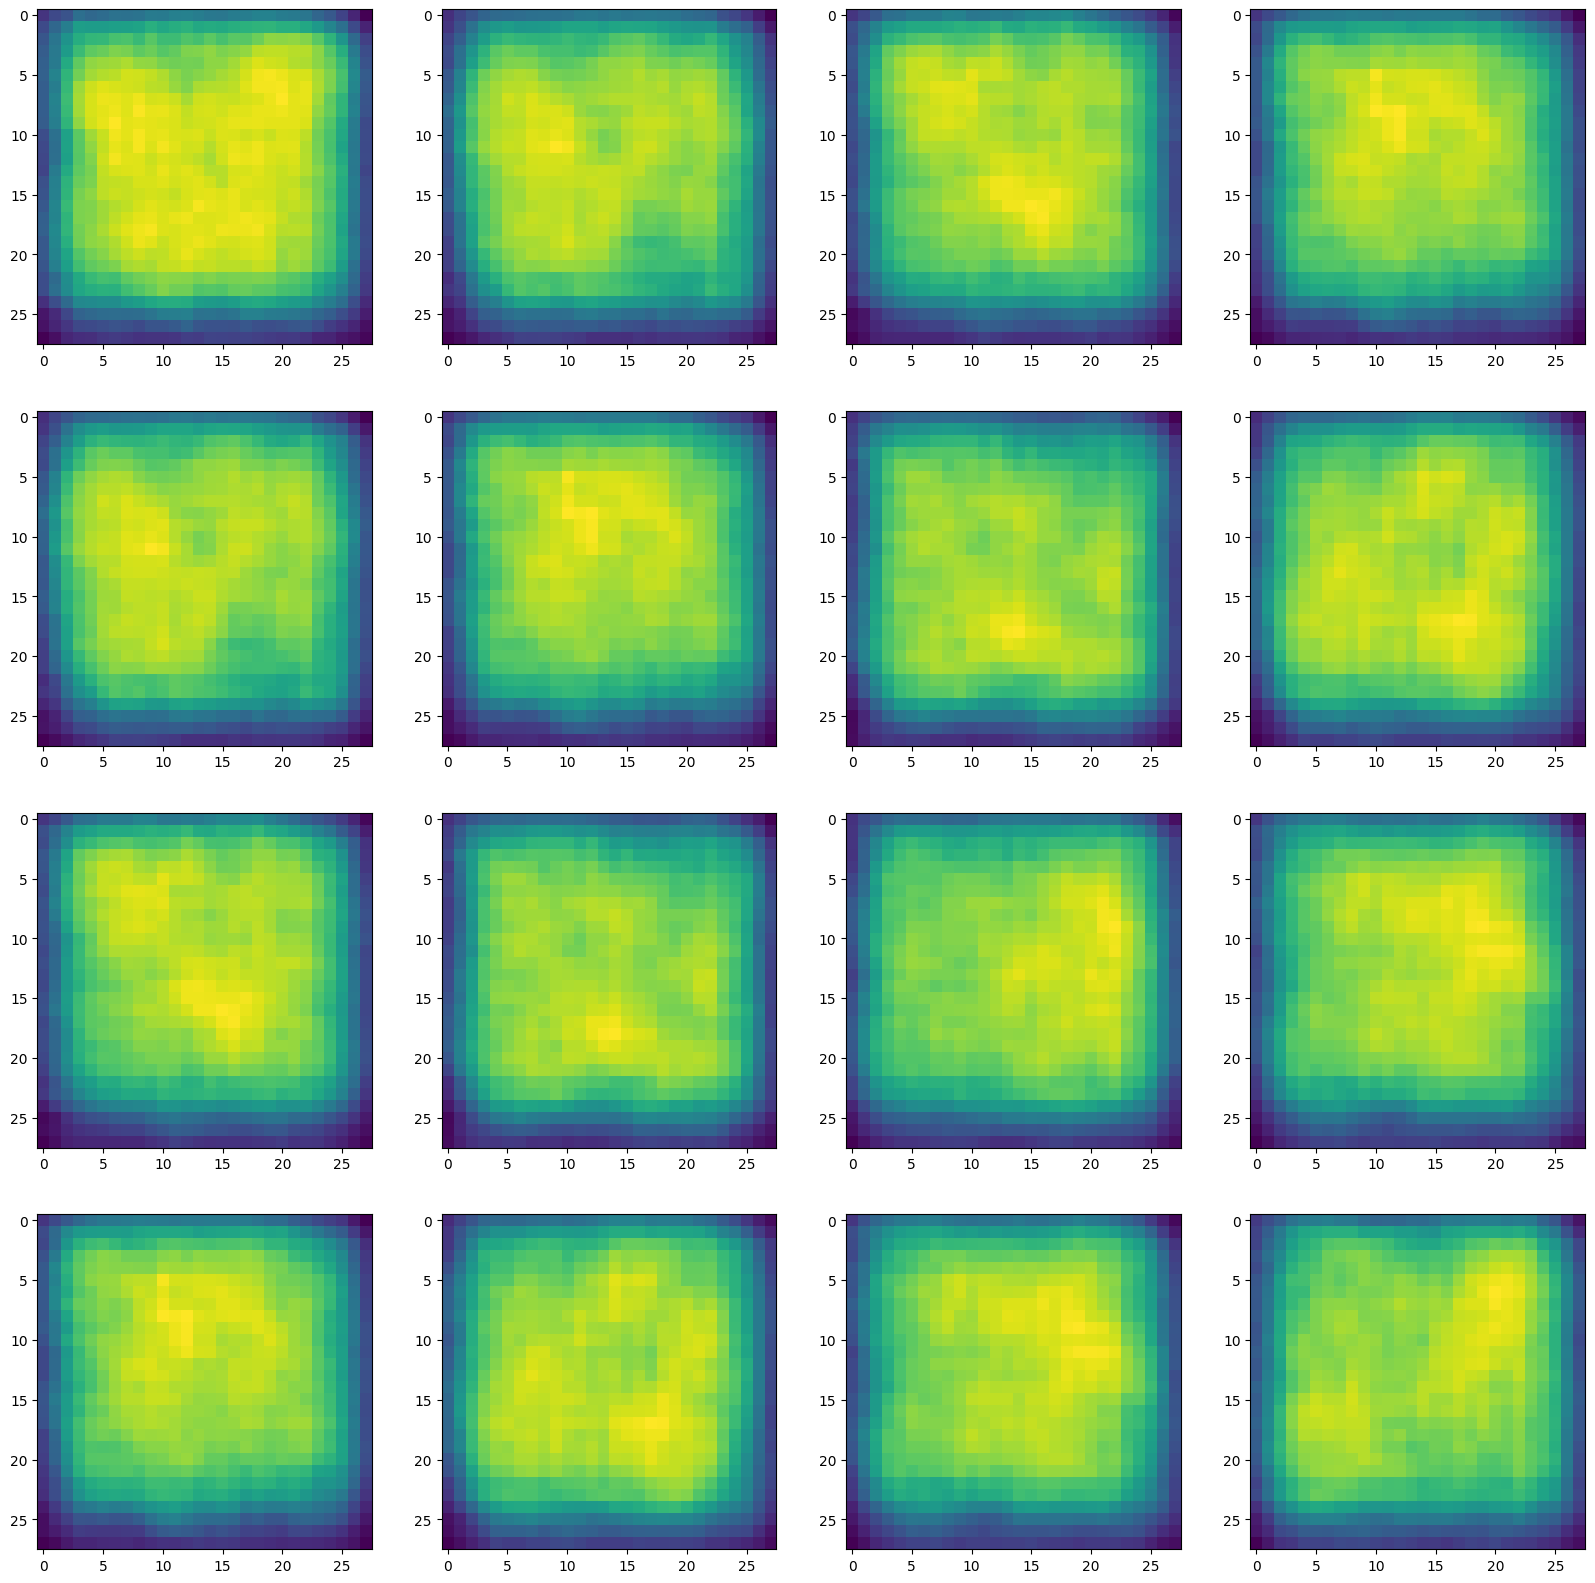

In [56]:
fig , ax = plt.subplots(ncols = 4, nrows = 4 , figsize=(20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [58]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')